# 파이썬 기반의 AI를 위한 기초수학, 확률및통계

In [25]:
## 강봉주 
## bonjour.kang@gmail.com
##
## 확률과 확률 변수
##

In [26]:
# 필요한 패키지
import numpy as np
import scipy
from scipy import linalg as la
import matplotlib.pyplot as plt

import scipy.stats as ss
import sympy

# 한글출력
plt.rcParams['font.family'] = 'Malgun Gothic' #  Windows 'Malgun Gothic' 
plt.rcParams['axes.unicode_minus'] = False

scipy.__version__

'1.15.3'

## 확률 밀도 함수

In [27]:
# 예제: 이산형 확률 밀도 함수
# 이항 분포
# 4번 시행에서 성공확률이 1/2인 경우
# 𝐴={0, 1, 2}의 확률을 계산해보자

In [28]:
# 해답
import scipy.special
A = [0, 1, 2]
trials = 4
event_prob = 1/2
np.sum(scipy.special.comb(trials, A) * event_prob ** trials)

np.float64(0.6875)

In [29]:
x = sympy.Symbol('x')
PA = sympy.integrate(sympy.exp(-x), (x, 0, sympy.oo))
PA

1

In [30]:
# 특정 이벤트의 확률 구하기
x = sympy.Symbol('x')
PA = sympy.integrate(sympy.exp(-x), (x, 0, 1))
PA

1 - exp(-1)

In [31]:
# 예제: 균등 분포의 분포함수
# 1) 구간 [0, 1]에서 정의된 균등 분포의 분포 함수를
# 정의하세요
# 2) 분포 함수를 x값에 따른 그래프를 그리세요

In [32]:
# 해답
#1)
a, b, x = sympy.symbols('a, b, x')
x = sympy.Symbol('x')
F = sympy.Lambda((x, a, b), x/(b-a))
F(x, 0, 1)

x

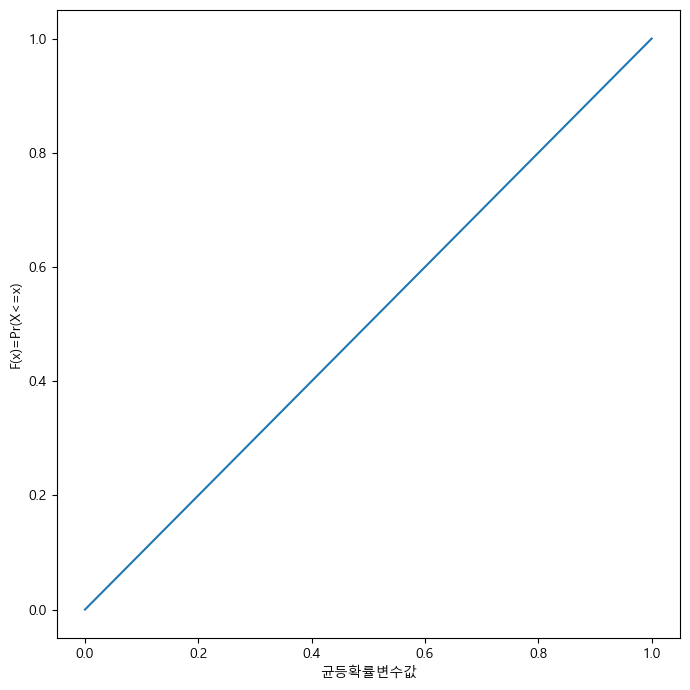

In [33]:
# 2)
x = np.linspace(0,1, 100)
cdf_x = x

fig, ax = plt.subplots(figsize=(7,7))
ax.plot(x, cdf_x)
ax.set_xlabel("균등확률변수값")
ax.set_ylabel("F(x)=Pr(X<=x)")

plt.tight_layout()

In [34]:
# 균등 분포의 기대값 구하기
x = sympy.Symbol('x')
mu = sympy.integrate(x*1/2, (x, -1, 1))
mu

0

In [35]:
# 분산 구하기
EX2 = sympy.integrate(x**2*1/2, (x, -1, 1))
EX2

1/3

In [36]:
sigma2 = EX2 - mu**2
sigma2

1/3

In [37]:
sigma = sympy.sqrt(sigma2)
sigma

sqrt(3)/3

In [38]:
# 기대값
import sympy

a, b, x = sympy.symbols('a, b, x')
mu = sympy.integrate(x/(b-a), (x, a, b))
mu.simplify().together()

(a + b)/2

In [39]:
# 제곱 기대값
EX2 = sympy.integrate(x**2/(b-a), (x, a, b))
EX2.simplify().factor()

(a**2 + a*b + b**2)/3

In [40]:
# 분산 계산
sigma2 = EX2 - mu**2
sigma2.simplify().factor()

(a - b)**2/12

In [41]:
# 적률 함수를 이용한 평균, 분산 구하기
mu, sigma, t = sympy.symbols('mu, sigma, t')
m_gen= sympy.exp(mu*t + (sigma**2 * t**2)/2)
# 1차 적률 구하기
m_gen.diff(t)

(mu + sigma**2*t)*exp(mu*t + sigma**2*t**2/2)

In [42]:
# 1차 적률: t=0
m_gen_func = sympy.Lambda(t, m_gen.diff(t))
EX = m_gen_func(0)
EX

mu

In [43]:
# 2차 적률 구하기
m_gen.diff(t, 2)

(sigma**2 + (mu + sigma**2*t)**2)*exp(t*(mu + sigma**2*t/2))

In [44]:
m_gen_func = sympy.Lambda(t, m_gen.diff(t, 2))
# 2차 적률: t=0
EX2 = m_gen_func(0)
EX2

mu**2 + sigma**2

In [45]:
# 분산
EX2 - EX**2

sigma**2

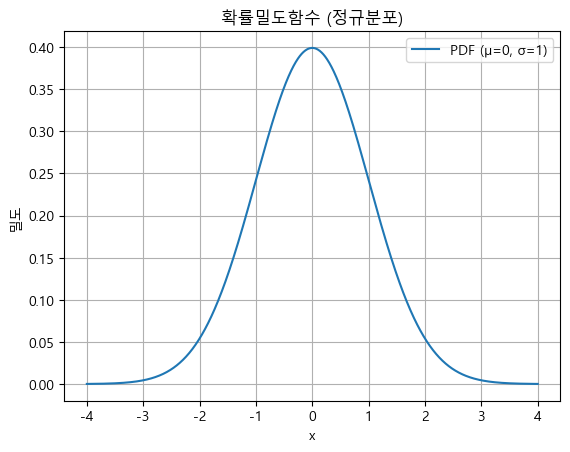

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# 평균 0, 표준편차 1인 정규분포
x = np.linspace(-4, 4, 1000)
pdf = norm.pdf(x, loc=0, scale=1)

# 시각화
plt.plot(x, pdf, label='PDF (μ=0, σ=1)')
plt.title('확률밀도함수 (정규분포)')
plt.xlabel('x')
plt.ylabel('밀도')
plt.grid(True)
plt.legend()
plt.show()

In [50]:
# x축 범위와 PDF 계산
x = np.linspace(150, 190, 100)
pdf = norm.pdf(x, loc=mu, scale=sigma)

# 객체 지향 방식
fig, ax = plt.subplots(figsize=(8, 5))

# PDF 곡선
ax.plot(x, pdf, label='정규분포 PDF')

# 확률이 해당되는 구간 채우기
ax.fill_between(x, pdf, where=(169.5 < x) & (x < 170.5), color='orange', alpha=0.5,
                label='P(169.5 < x < 170.5)')

# 제목 및 레이블 설정
ax.set_title('키의 확률밀도함수 (N(170, 5²))')
ax.set_xlabel('키 (cm)')
ax.set_ylabel('밀도')
ax.legend()
ax.grid(True)

# 그래프 출력
plt.show()

TypeError: Cannot convert expression to float

기댓값 E[X]: 5.0
분산 Var[X]: 8.3333


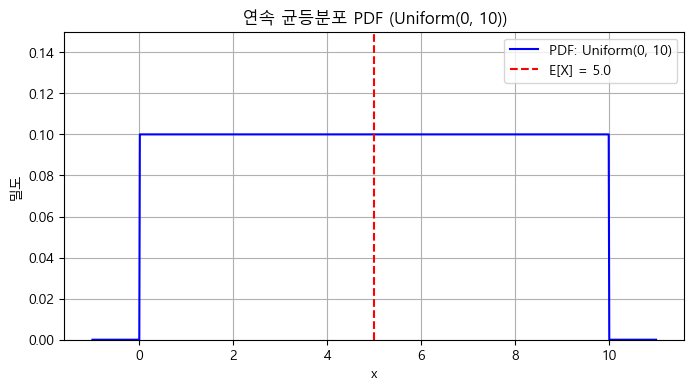

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, uniform

# 균등분포 정의, 0~10
a = 0
b = 10
x = np.linspace(a - 1, b + 1, 1000) # 1000개의 데이터 의미
pdf = uniform.pdf(x, loc = a, scale=(b-a))

# 기댓값과 분산
expected = (a + b) / 2
variance = ((b - a) ** 2) / 12

print(f"기댓값 E[X]: {expected}")
print(f"분산 Var[X]: {variance:.4f}")

# 시각화
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(x, pdf, label='PDF: Uniform(0, 10)', color='blue')
ax.axvline(expected, color='red', linestyle='--', label=f'E[X] = {expected}')
ax.set_title('연속 균등분포 PDF (Uniform(0, 10))')
ax.set_xlabel('x')
ax.set_ylabel('밀도')
ax.set_ylim(0, 0.15)
ax.legend()
ax.grid(True)
plt.show()